# TC5: Signal and Image Processing; Assignment 1 Zoom in Images

The aim of this assignment is to program a resizer of images such that an image can be zoomed into or zoomed out of.

First, let's import the necessary packages.

In [202]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pylab as pyl
from scipy import fftpack 
import seaborn as sns
from skimage import io, transform
sns.set()

Next up, the data should be imported. It is assumed that only .jpg files will be imported.

In [203]:
image = imageio.imread('C:/Users/Robin-PC/Desktop/barbara.jpg')

To see the image that we are working with, we plot it and see a grayscale image of a hooded woman.

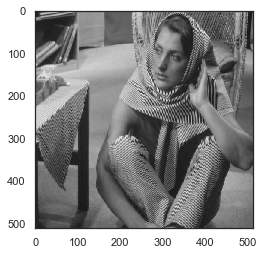

In [204]:
with sns.axes_style("white"):
    plt.imshow(image, cmap='gray')

For some reason, the image is imported as an RGB image (3 colour channels) which are all the same. Thus, only one channel is chosen.

In [205]:
image = image[:,:,0]
image.shape

(512, 512)

Now that the image just has 2 dimensions, a fourier transform is applied and subsequently a shift is applied to the spectrum, which is afterwards plotted.

In [206]:
image_fft = np.fft.fft2(image)
#image_fft_magn = np.abs(image_fft)

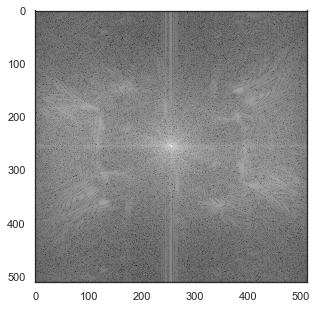

In [207]:
image_fft_shift = np.fft.fftshift(image_fft)

plt.figure(figsize = (5,5))

with sns.axes_style("white"):
    plt.imshow(np.log(abs(1e-10+image_fft_shift)),cmap='gray')

### Downsize the image

First off, we will downsize the image. This is done in both the space domain, which is done first, and in the Fourier domain.

(256, 256)


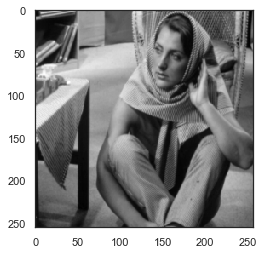

In [208]:
img_down_s = cv2.pyrDown(image)

with sns.axes_style("white"):
    plt.imshow(img_down_s, cmap='gray')

print(img_down_s.shape)

The image and the shape show that the image has been downsampled to half the size.

In [209]:
n = image.shape[1]
img_down_f = image_fft_shift[n//4:n-n//4, n//4:n-n//4]

In [210]:
image_down_f_s = abs(np.fft.ifft2(np.fft.ifftshift(img_down_f)))

(256, 256)


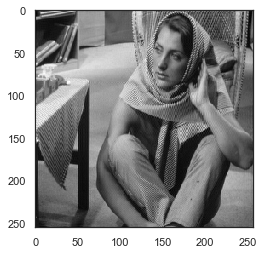

In [211]:
with sns.axes_style("white"):
    plt.imshow(image_down_f_s, cmap='gray')
    
print(image_down_f_s.shape)

### Upscale the image

First, the image will be upscaled in the space domain, and afterwards it will be done in the Fourier domain by sinc interpolation.

(1024, 1024)


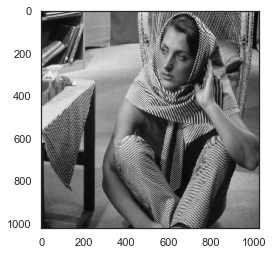

In [212]:
img_up_s = cv2.resize(image, dsize=(2*image.shape[0],2*image.shape[0]))

with sns.axes_style("white"):
    plt.imshow(img_up_s, cmap='gray')

print(img_up_s.shape)

The image and the shape show that the image has been upscaled to double the size.

Now we will do the same thing in the Fourier domain using zero padding.

In [213]:
image_fft_pad = np.pad(image_fft_shift, 256, mode='constant')

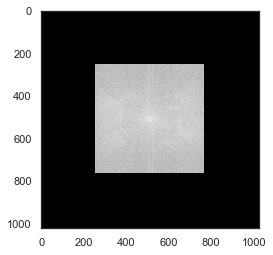

In [214]:
with sns.axes_style("white"):
    plt.imshow(np.log(abs(1e-10+image_fft_pad)),cmap='gray')

In [215]:
image_up_f = abs(np.fft.ifft2(np.fft.ifftshift(image_fft_pad)))

(1024, 1024)


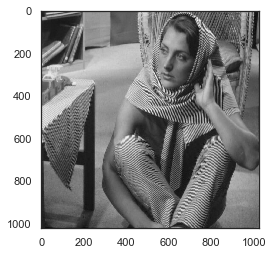

In [216]:
with sns.axes_style("white"):
    plt.imshow(image_up_f, cmap='gray')
    
print(img_up_s.shape)

The result is the same as for the space domain.